# Airplane Paper Challenge

Problem proposed in 01_03_PhugoidFullModel notebook
This time with a slightly different approach, better understanding the way lists and multimensional arrayas are indexed and sliced.

In [70]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

In [71]:
#Constants and discretization of the time domain
g = 9.81
v_t = 4.9
LtoD = 5.
DtoL = 1/LtoD
t = 100
dt = 0.01
N = int(t/dt) + 1

#Initial values. Ranges of values for v0 and theta0
v0_values = np.linspace(3.,6.5, num=10, endpoint=True)
theta0_values = np.linspace(-np.pi/2, np.pi/2, num=10, endpoint=True)
x0 = 0
y0 = 2.

In [72]:
#Definition of the function f(u)
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of floats
        array containing the solution at time t.
        
    Returns
    -------
    dudt : array of floats
        array containing the RHS of f(u), given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return np.array([-g*np.sin(theta) - DtoL*g/v_t**2*v**2,
                      -g*np.cos(theta)/v + g/v_t**2*v,
                      v*np.cos(theta),
                      v*np.sin(theta)])

In [73]:
#Definition of the Euler-step function
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of floats
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_{n+1} : array of floats
              approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [74]:
#initialising and empty LIST to hold all solutions
u_set = []

#Numerical process to get u_set
for i, v0 in enumerate(v0_values):
    for j, theta0 in enumerate(theta0_values):
        
        u = np.zeros((N,4))
        u[0] = np.array([v0, theta0, x0, y0])
       
        #Iterating through the range of initial values and breaking if y<0
        for n in range(N-1):
            u[n+1] = euler_step(u[n], f, dt)
            
            if u[n+1,3] < 0:
                u[n+1] = np.zeros((1,4))
                break
    
        u_set.append(u)

- `u_set` contains `k`-solutions, each one corresponding to a particular combination of `v0` and `theta0`.
- Each `k`-solution has `n`-rows, each one corresponding to a particular time
- Each `n`-row has 4 entries, each one for `v`, `theta`, `x` and `y`.

In [75]:
#Finding the maximum value reached for x (u_set[k][n,2]) and recording its indexes
x_max = 0
x_max_index = (0,0)

for k in range(len(u_set)):
    for n in range(N-1):
        x_test = u_set[k][n,2]
        if x_test >= x_max:
            x_max = x_test
            x_max_index = (k, n)

`x_max_index` is a duplet conatining the the `k`-index for the solution where `x_max` happens, and the timestep `n`. The values of `v0` and `theta0` for such solution are read as `u_set[x_max_index[0]][0,0]` amd `u_set[x_max_index[0]][0,1]` respectively.

In [76]:
#Extracting all values of x and y off the general solution u_set
x_values = np.zeros((len(u_set),N))
y_values = np.zeros((len(u_set),N))

for k in range(len(u_set)):
    for n in range(N-1):
        x = u_set[k][:,2]
        y = u_set[k][:,3]
    
    x_values[k] = x
    y_values[k] = y

In [77]:
#Printing results
print(r'The longest flight is achieved for v_0=', u_set[x_max_index[0]][0,0], 'and theta0=', round(u_set[x_max_index[0]][0,1], 3), 'at', round(x_max, 3), 'metres.')

The longest flight is achieved for v_0= 6.5 and theta0= 0.175 at 14.805 metres.


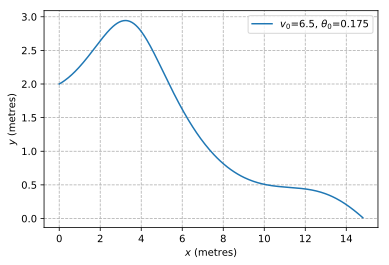

In [79]:
#plotting the trajetory with the largest x value
lab = r'$v_0$='+ str(u_set[x_max_index[0]][0,0]) + r', $\theta_0$=' + str(round(u_set[x_max_index[0]][0,1], 3))
fig, ax=plt.subplots()
plt.plot(np.trim_zeros(x_values[x_max_index[0]], trim='b'), np.trim_zeros(y_values[x_max_index[0]], trim='b'), label=lab)
plt.ylabel(r'$y$ (metres)')
plt.xlabel(r'$x$ (metres)')
plt.grid(True, linestyle='--')
plt.legend()

In [69]:
%reset -f